### Student Information
Name: 黃晨溦 Chen-Wei Huang

Student ID: 112024803

GitHub ID: huang-chen-wei

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [38]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

# So we don't need to always run phase 1 again
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. The Data and Data Preparation
The dataset consists of Reddit posts and comments related to stock discussions, collected from communities such as wallstreetbets, StockMarket, and stockstobuytoday. Each record includes metadata (author, datetime, upvotes), textual content (title, body, entities), and sentiment scores (subjectivity, polarity, sentiment label). The dataset is particularly useful for studying retail investor behavior, market sentiment analysis, etc.

In [39]:
from pathlib import Path

p = Path("newdataset\Reddit-stock-sentiment.csv")
df = pd.read_csv(p, low_memory=False)
# 1. Quick preview
print(df.shape) # (number of data, number of variables/fetures)
df[0:4]

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


The reddit data has 16 variables with following meanings:

| Column               | Description                                                                    | Type        | 
| -------------------- | ------------------------------------------------------------------------------ | -----       | 
| **type** (V)         | Whether the entry is a Reddit *post* or *comment*.                             | categorical | 
| **datetime**         | Timestamp of when the post/comment was created.                                | interval    | 
| **post_id**          | Unique Reddit ID for the post/comment.                                         | categorical | 
| **subreddit** (V)    | Source community (e.g., `wallstreetbets`, `StockMarket`).                      | categorical | 
| **title** (V)        | Title of the post (for `type=post`), or context.                               | text | 
| **author**           | Reddit username of the poster/commenter.                                       | categorical | 
| **url**              | Link to the post or external content (e.g., news, image, article).             | categorical | 
| **upvotes**          | Number of upvotes received.                                                    | ratio | 
| **downvotes**        | Number of downvotes received (NaN if unavailable).                             | ratio | 
| **upvote_ratio** (V) | Ratio of upvotes to total votes.                                               | ratio | 
| **text** (V)         | Main text body of the post or comment.                                         | text | 
| **subjectivity** (V) | A score (0–1) indicating subjectivity of text (0 = objective, 1 = subjective). | interval | 
| **polarity** (V)     | Sentiment polarity score (negative to positive, usually -1 to +1).             | interval | 
| **sentiment** (V)    | Simplified sentiment label (e.g., -1 = negative, 0 = neutral, 1 = positive).   | ordinal | 
| **entities** (V)     | Named entities extracted (companies, tickers, people, etc.).                   | categorical | 
| **label** (V)        | Final classification label (e.g., sentiment label used for ML).                | ordinal | 


In [3]:
# 1. Summary of numeric columns
print('===== Summary of important numeric columns =====')
print(df.describe()[['upvotes', 'downvotes', 'upvote_ratio', 'subjectivity', 'polarity']])

# 2. Count categorical variables
print('===== Counts of Posts vs Comments =====')
print(df['type'].value_counts())       # posts vs comments

print('===== Counts of subreddit =====')
print(df['subreddit'].value_counts())  # which subreddit the text is

print('===== Counts of sentiment =====')
print(df['sentiment'].value_counts().sort_index())

print('===== Counts of label =====')
print(df['label'].value_counts().sort_index())
#print(df.isna().sum()) # Missing data overview

===== Summary of important numeric columns =====
           upvotes  downvotes  upvote_ratio  subjectivity    polarity
count   847.000000  64.000000     64.000000    847.000000  847.000000
mean     12.262102   0.265625      0.981406      0.346768    0.036116
std     142.126337   1.461052      0.068147      0.317261    0.297814
min     -74.000000   0.000000      0.500000      0.000000   -1.000000
25%       1.000000   0.000000      1.000000      0.000000    0.000000
50%       1.000000   0.000000      1.000000      0.366667    0.000000
75%       4.000000   0.000000      1.000000      0.577500    0.150000
max    3943.000000  11.000000      1.000000      1.000000    1.000000
===== Counts of Posts vs Comments =====
type
comment    783
post        64
Name: count, dtype: int64
===== Counts of subreddit =====
subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64
===== Counts of sentiment =====
sentiment
-1.0    197
 0

####  >>> Exercise 1 (Overview of the main text data)

% Answer here

We can easily spot the possible difference in document length and the content between 'comment' and 'post'. Comments are shorter and do not carry lots of actual information.  Posts are relatively longer and informative.

In [ ]:
for i in range(4):
    print(f"Example {i+1}")
    print("\n".join(df.text[i].split("\n")))

## 3. Data Transformation
The data is quite well-prepared. 
####  >>> **Exercise 2 & 3 (Querying techniques)**
For exercise 2, we use querying technique to select 12 feature that is important, and familiarize ourself with the data.

In [40]:
#Answer here
X = df.iloc[:, [0, 3, 4, *range(7, 16)]]

For exercise 3, try to fetch records belonging to the category of subereddit ```stockstobuytoday```, and query every 10th record. Only show the first 5 records.

In [6]:
X[X['subreddit']=='stockstobuytoday'][::10][0:5] 

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
59,comment,stockstobuytoday,r/stockstobuytoday Lounge,1,NaN,NaN,heard chatter upto $350,0.000000,0.000000,0.0,"['heard', 'chatter']",0.0
112,comment,stockstobuytoday,Anyone been looking into OneMedNet?,0,NaN,NaN,"nice, good info, good post.",0.733333,0.666667,1.0,"['info', 'post']",1.0
158,post,stockstobuytoday,What will happen with 2022?,8,0.0,0.91,Investors brace for more volatility as the wes...,0.000000,0.000000,0.0,"['Russia', 'west', 'access', 'volatility', 'Sw...",0.0
186,comment,stockstobuytoday,$PPSI short squeeze 43% shorted,1,NaN,NaN,Date|Symbol|ShortVolume|ShortExemptVolume|Tota...,0.000000,0.000000,0.0,"['%', 'Q', 'N', 'Date|Symbol|ShortVolume|Short...",0.0


## 4. Data Mining using Pandas
### 4.1 Missing Values
#### >>> **Exercise 4 (Missing Values):** 
Calculating missing values by column and in every record instead of every column, respectively. Observe that missing values occurs in ```downvotes``` and ```upvote_ratio```, and that they are 783 numbers of data contains missing vlues

In [12]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,783,0,0,0,0,0,0


In [13]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [9]:
X_missing = X.loc[X['downvotes'].isnull(), :]
print(X_missing['type'].value_counts())

type
comment    783
Name: count, dtype: int64


### 4.2 Duplicate Data
Check how many duplicates we have in our current dataset. We can see that we have 21 pairs of duplicated data. If we only focus on ```text``` we have 23 pairs of duplicated data. As we inspect further we see that some people might repost same content mupltiple times.

In [10]:
print(sum(X.duplicated()))
print(sum(X['text'].duplicated()))

21
23


In [11]:
X[X.duplicated('text')].loc[[595, 679], :]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
595,post,stockstobuytoday,Crypto Gainers - Coinbase,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0
679,post,stockstobuytoday,Crypto Gainers - Coinbase,1,0.0,1.0,"&#x200B;\r\n\r\n [Cryptocurrency Prices, Chart...",0.0,0.0,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0


## 5.  Data Preprocessing
### 5.1 Sampling

In [11]:
X_sample = X.sample(n=400, replace=False, random_state=97)
print(len(X_sample))
X_sample[0:4]

400


,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
803,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,8,NaN,NaN,This term so far is even less politically stab...,0.440000,0.196667,1.0,"['lol', 'term']",-1.0
599,comment,stocks,US consumer sentiment plummets to second-lowes...,-2,NaN,NaN,"Yes, Trump and everyone who voted for him are ...",0.452381,0.027381,1.0,"['news', 'site', 'figure', 'Trump', 'sense', '...",0.0
814,comment,StockMarket,$ U.S. dollar value (crashing),10,NaN,NaN,He could just sleep through the presidency lik...,0.000000,0.300000,1.0,"['Biden', 'success', 'presidency']",-1.0
200,comment,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,1,NaN,NaN,I need people to understand this man is NOT st...,0.604242,-0.260227,-1.0,"['plan', 'goal', 'man', 'USD', 'US', 'economy'...",1.0


### >>> Exercise 6 (Difference between original data and sampled data):

% Answer here

1. Row count:
The original data has more rows (847 rows), while sample data will always have exactly number of data we assigned which is n = 400 rows.

2. Row order:
The original number index is preserved, but the order of rows in sample data is shuffled compare to the original. So you'll see that the index value is messy.

In [12]:
# Answer here
sum(X.duplicated())  # By default, it samples without replacement, so you won’t see duplicate rows in X_sample.
print(len(X_sample)) # Row count is different from X (Show the row count = 1000)
X_sample[0:3]        # Row order is different from X (Show the first three row)

400


,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
803,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,8,NaN,NaN,This term so far is even less politically stab...,0.440000,0.196667,1.0,"['lol', 'term']",-1.0
599,comment,stocks,US consumer sentiment plummets to second-lowes...,-2,NaN,NaN,"Yes, Trump and everyone who voted for him are ...",0.452381,0.027381,1.0,"['news', 'site', 'figure', 'Trump', 'sense', '...",0.0
814,comment,StockMarket,$ U.S. dollar value (crashing),10,NaN,NaN,He could just sleep through the presidency lik...,0.000000,0.300000,1.0,"['Biden', 'success', 'presidency']",-1.0


### >>> Exercise 7 (Bar plot):

<Axes: title={'center': 'Category distribution'}, xlabel='label'>

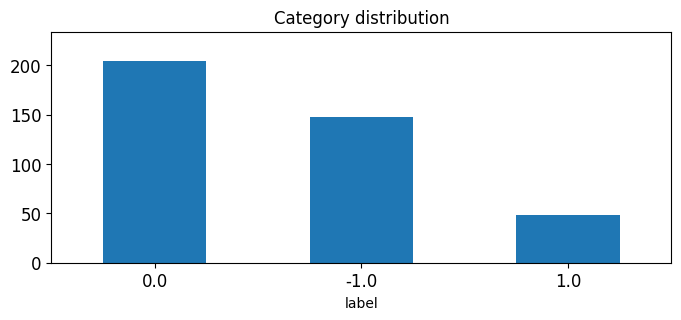

In [13]:
# Answer here
X_sample.label.value_counts().plot(kind = 'bar',
                                   title = 'Category distribution',
                                   ylim = [0, X_sample.label.value_counts().max()+30],        
                                   rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (Bar plot between original and sampled data):


===== subreddit =====
                  Full Dataset  Sample
subreddit                             
StockMarket                250     117
stocks                     274     137
stockstobuytoday           174      87
wallstreetbets             149      59


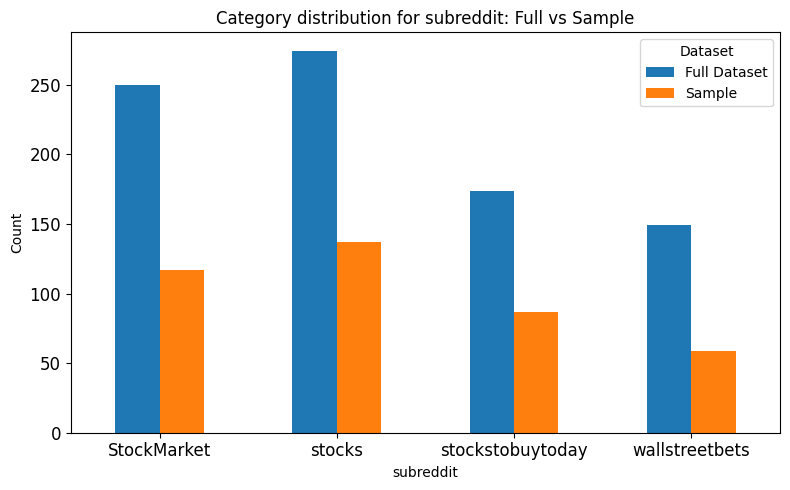


===== type =====
         Full Dataset  Sample
type                         
comment           783     371
post               64      29


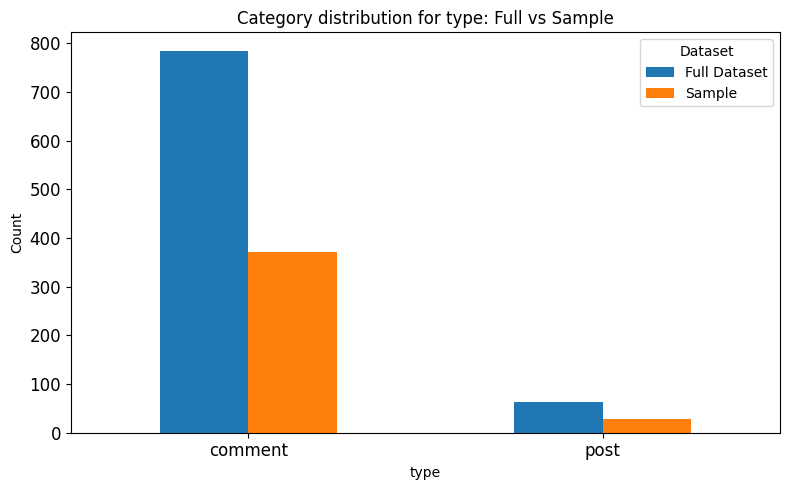


===== sentiment =====
           Full Dataset  Sample
sentiment                      
-1.0                197     104
 0.0                331     154
 1.0                319     142


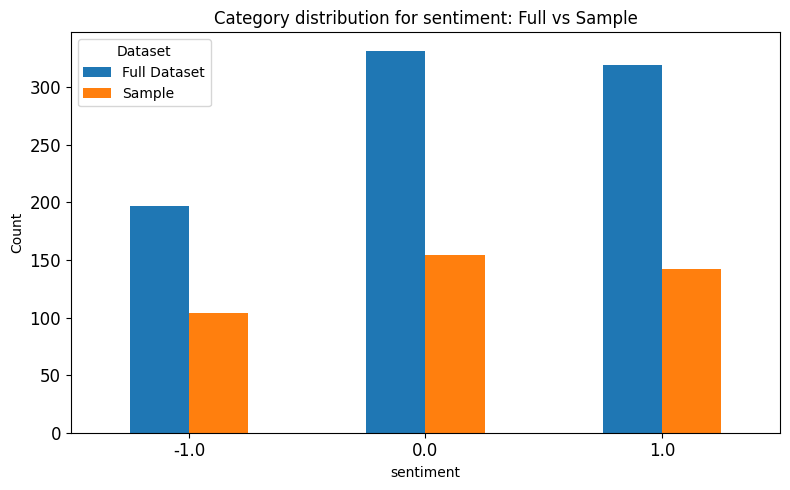


===== label =====
       Full Dataset  Sample
label                      
-1.0            315     148
 0.0            423     204
 1.0            109      48


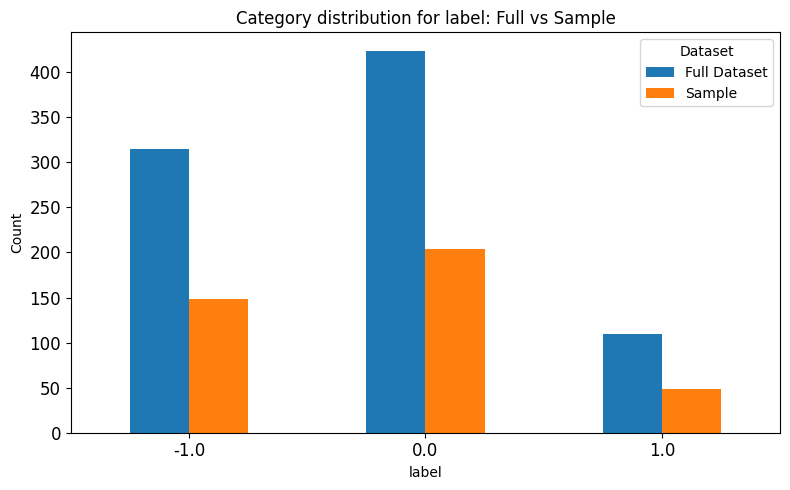

In [14]:
import matplotlib.pyplot as plt

# List of variables you want to compare
vars_to_plot = ["subreddit", "type", "sentiment", "label"]

for var in vars_to_plot:
    counts_full = X[var].value_counts().sort_index()
    counts_sample = X_sample[var].value_counts().sort_index()
    
    df_compare = pd.DataFrame({
        "Full Dataset": counts_full,
        "Sample": counts_sample
    }).fillna(0)   # fill missing categories with 0
    
    print(f"\n===== {var} =====")
    print(df_compare)
    
    # Plot grouped barplot
    ax = df_compare.plot(
        kind="bar",
        title=f'Category distribution for {var}: Full vs Sample',
        ylabel='Count',
        xlabel=var,
        rot=0,
        fontsize=12,
        figsize=(8, 5)
    )
    
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

### 5.2 Feature Creation

In [16]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chenw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X["unigrams"]

C:\Users\chenw\AppData\Local\Temp\ipykernel_13572\193297623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


0                                   [Calls, on, retards]
1      [Stunt, as, in, like, why, did, they, even, ma...
2            [Seeing, lots, of, red, in, the, ticker, .]
3      [Vision, Marine, Technologies, Inc., is, rewri...
4                   [He, didn, ’, t, say, thank, you, .]
                             ...                        
842    [Invest, now, it, is, going, to, shoot, up, to...
843                       [Where, can, I, read, this, ?]
844    [Upgrades, ,, Downgrades, [, Stock, Analyst, R...
845    [i, sold, my, puts, so, i, expect, cheeto, to,...
846           [!, [, img, ], (, emote|t5_2th52|31224, )]
Name: unigrams, Length: 847, dtype: object

In [18]:
X[0:2]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,unigrams
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma..."


In [19]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection
We are going to generate a document-term matrix from the original dataset.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [21]:
count_vect.get_feature_names_out()[692]

'calls'

In [22]:
count_vect.get_feature_names_out()[2706]

'on'

### **>>> Exercise 9 (Analyze the text data using build_analyzer()):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built.

In [53]:
# Answer here
analyze = count_vect.build_analyzer() # tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
analyze(X.text[0])

['calls', 'on', 'retards']

Now let us look at the term-document matrix we built above, observe that we have 847 data and 4346 terms.

In [25]:
X_counts.shape

(847, 4346)

In [26]:
# we can obtain the feature names of the vectorizer, i.e., the terms usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [27]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (Querying nonzero entities in document-term matrix):**
Notice that there is a 3 in the above record. Provide code that can verify what word this 3 represents from the vocabulary. As we look in the first nonzero value above, we find out from our feature names that means the article has three `116` term

In [28]:
mask = X_counts[3].toarray() == 3 # find which columns in the document are nonzero
true_indices = np.flatnonzero(mask.ravel()) # ravel() helps flatten to 1D
count_vect.get_feature_names_out()[true_indices[0:1]] # The first nonzero column shown above

array(['116'], dtype=object)

Using first 20 features (terms) and first 20 documents only, we observe that the document-term matrix is very sparse.

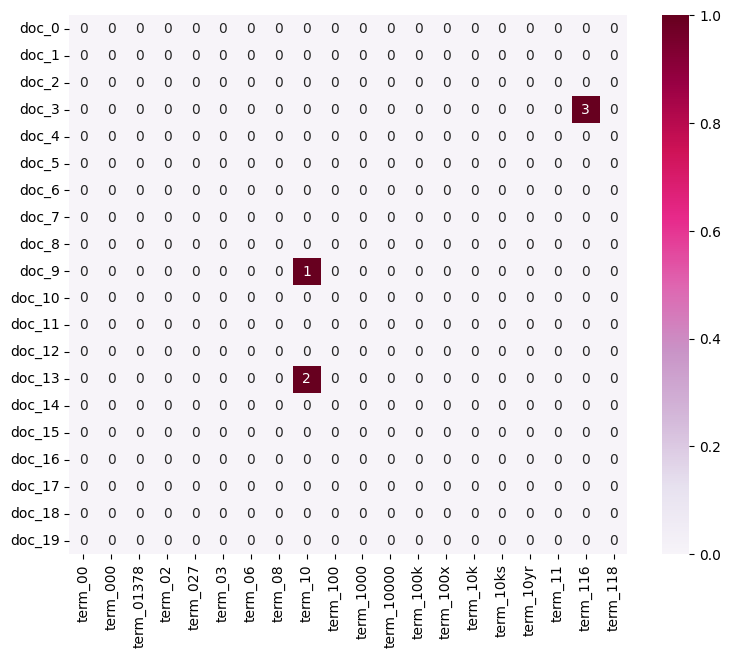

In [29]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]] # first twenty features only
plot_y = ["doc_"+str(i) for i in list(X.index)[0:20]] # obtain document index
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (Heatmap of document-term matrix):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only few terms with low **frequencies** in the subselection of the matrix. We can try to modify the code above to plot the entire term-document matrix or just a sample of it.

% Answer here

If no sampling while plotting term-document matrix, it'll take a lot time plotting a simple heatmap. 
So we need to think about how to sample informative data! The following is my way:
1. **Inspect terms frequency**: Calculate the term frequency over all documents
2. **Pick informative slices:** The idea is to select terms that is informative (not low frquencies) and with differnt term frequencies characteristics. Order from most to least and only show the first 30 records. 
4. **Sample documents:** Randomly choose 30 document indices
5. **Draw heatmap:** Draw heatmap between sample documents and informative word slices

By this we **extract wide range of terms with different frequecncy and observe the data structure**. Also it is informative that we can inspect the different behavior between very frequent and relative non-frequent word.

          term  count  index
the        the    920   3848
to          to    566   3911
and        and    488    327
is          is    402   2149
it          it    350   2161
of          of    311   2687
in          in    286   2024
that      that    238   3846
for        for    214   1604
this      this    213   3866
you        you    195   4333
on          on    171   2706
are        are    155    374
they      they    150   3858
be          be    134    486
he          he    132   1846
will      will    127   4255
with      with    126   4271
if          if    119   1987
as          as    115    388
market  market    111   2424
but        but    108    675
not        not    107   2659
so          so    103   3544
have      have     97   1842
all        all     97    289
us          us     96   4087
just      just     95   2197
was        was     94   4183
trump    trump     92   3977


<Axes: title={'center': 'Category distribution'}>

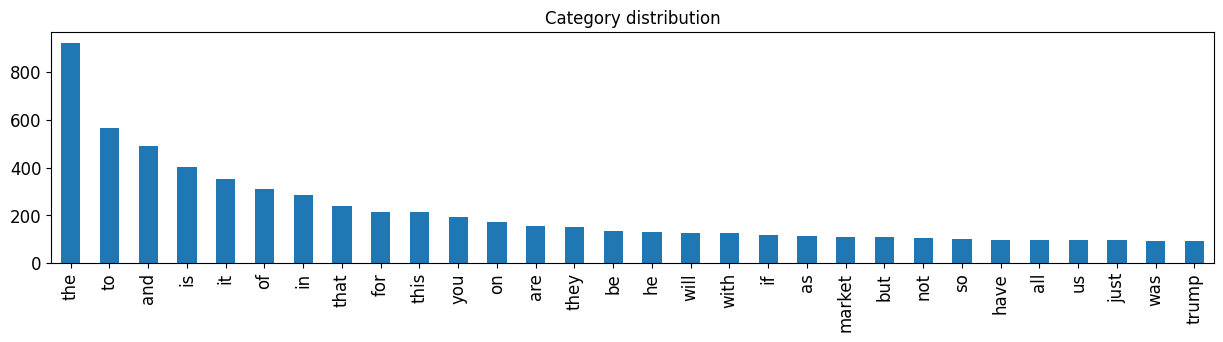

In [30]:
# n_docs = number of documents, n_terms = number of terms
n_docs, n_terms = X_counts.shape

# ---- 1. Inspect terms frequency ----
# Get the vocabulary
terms = count_vect.get_feature_names_out()
# Get the document frequency for each term (a term appears in how many docs)
term_frequencies_mine = np.asarray(X_counts.sum(axis=0)).ravel()  # shape: (n_terms,)
# Make a table that shows the word frequency
df_terms = pd.DataFrame({
    "term": terms,
    "count": term_frequencies_mine
})
df_terms['index'] = df_terms.index
df_terms.index = terms

# ---- 2. Pick informative slices ----
# Make a table that shows words from most to least frequent while query every 20th record and only show the first 30 records.
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_select = df_terms.iloc[order][0:30]
print(df_terms_select)
df_terms_select['count'].plot(kind = 'bar', title = 'Category distribution', fontsize = 12, figsize = (15,3)) # If want to see the bar plot

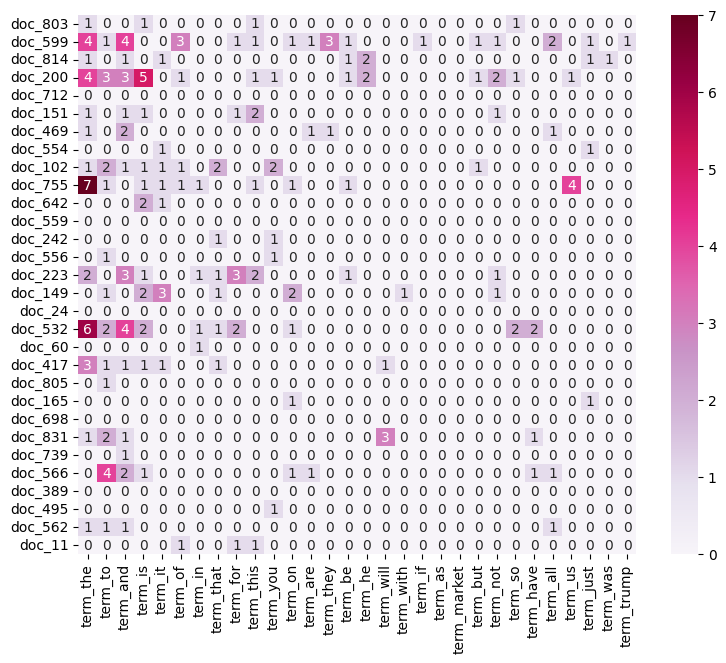

In [31]:
# ---- 3. Sample documents ----
X_sample_small = X.sample(n=30, replace=False, random_state=97)

# ---- 4. Draw heatmap ----
# Selected informative document-term matrix: X_count_select[100 random sampled documents x 100 mose frequent words
X_count_select = X_counts[X_sample_small.index][:,df_terms_select['index']].toarray()
plot_x = ["term_"+str(i) for i in df_terms_select['term']]
plot_y = ["doc_"+str(i) for i in list(X_sample_small.index)] # obtain document index
plot_z = X_count_select
df_draw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_draw,
                 cmap="PuRd",
                 vmin=0, vmax=7, annot=True)

From this we can see how sparse the matrix is. Even though in our process we actually record those word that does not only appear one time in the whole dataset (see the print of `df_terms_select`), but we can still see that these relative frequent word does not appear in many documents. There are many many parts in the matrix is 0. From this matrix we can also make a guess that many frequent word might not carry actual information of the document, like `the`, `to`, `amd` etc. We may need to deal with these uninformative words in later tasks.

### 5.4 Attribute Transformation / Aggregation
###  5.4.1 Transform Text Data
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words.

In [35]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [36]:
np.array_equal(term_frequencies_mine, term_frequencies) # The counting method of teacher and of mine gives same result 

True

C:\Users\chenw\AppData\Local\Temp\ipykernel_19320\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


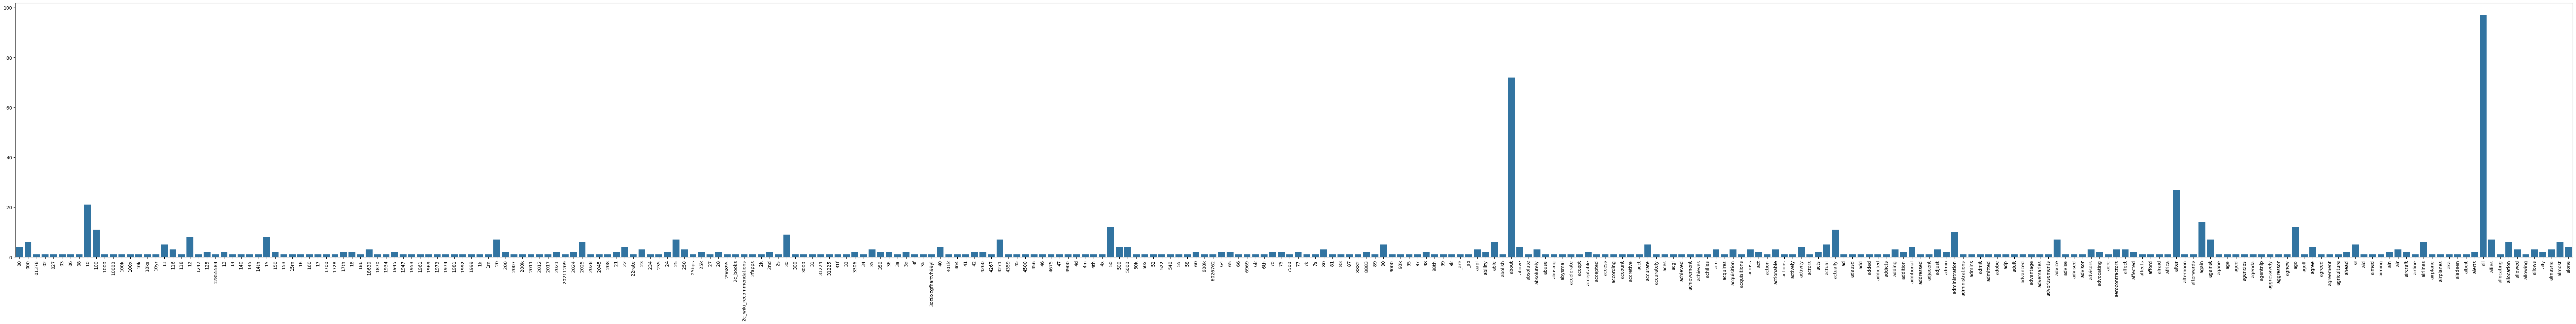

In [37]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (Interactive visualization using plotly):**

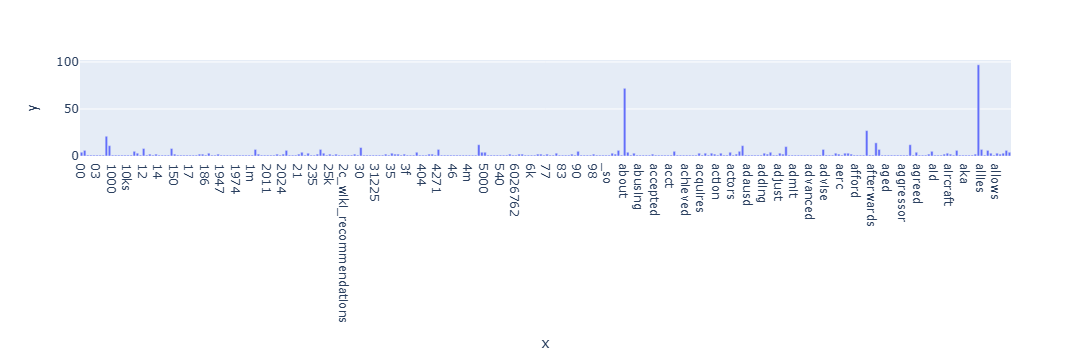

In [38]:
# Answer here
import plotly.express as px

fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300]
)
fig.show()

### >>> **Exercise 13 (Create meaningful visualization in term frequency distribution):** 
The chart above only contains 300 vocabulary in the documents, and it's messy. Efficiently reduce the number of terms you want to visualize.

% Answer here

First we observe the term frequencies from high to low (the below chart) to choose an appropriate thereshold on term frequencies. By observation, 50 might be a good thereshold that shows much data but not to much for the plot to be messy. So, here I only show the words when its frequencies are more then 50. `df_term` is the table that I created above which record term names and its corresponding count / frequencies

In [39]:
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_sort = df_terms.iloc[order]
df_terms_sort[:30]

,term,count,index
the,the,920,3848
to,to,566,3911
and,and,488,327
is,is,402,2149
it,it,350,2161
of,of,311,2687
in,in,286,2024
that,that,238,3846
for,for,214,1604
this,this,213,3866


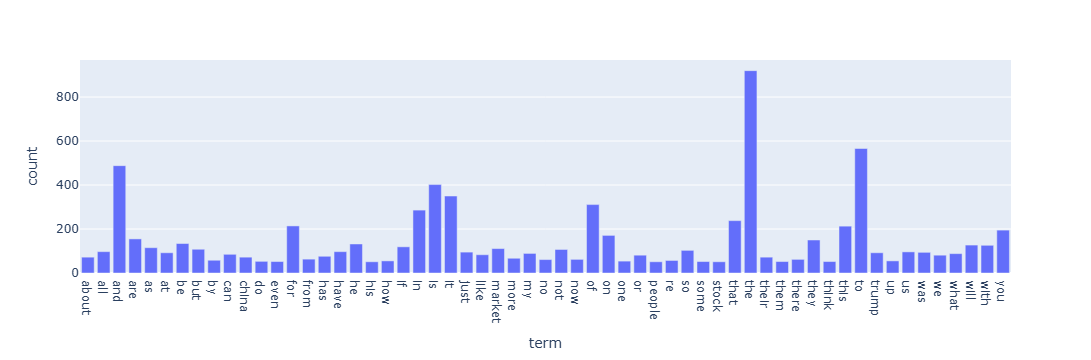

In [40]:
thereshold = df_terms['count'] > 50
fig = px.bar(
    data_frame=df_terms.loc[thereshold],
    x='term',
    y='count'
)
fig.show()

### >>> **Exercise 14 (Create meaningful visualization in term frequency distribution: sort by frequencies):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail).

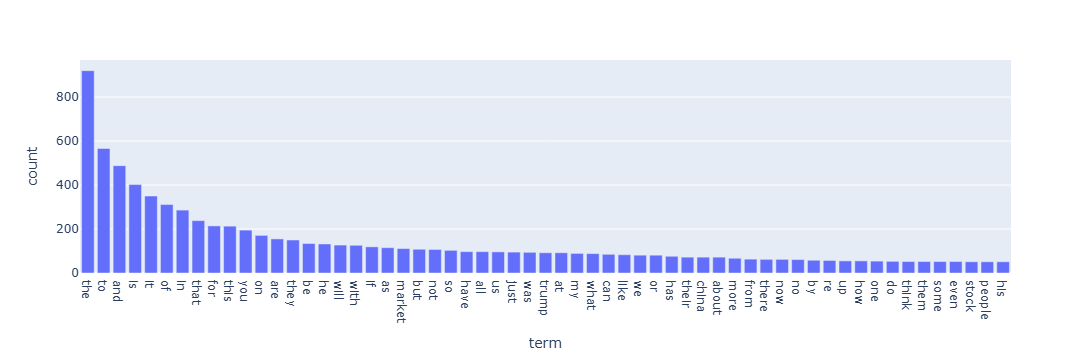

In [41]:
# Answer here
# order by frequencies
order = np.lexsort((np.arange(0,n_terms), term_frequencies_mine))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
df_terms_sort = df_terms.iloc[order]
thereshold = df_terms_sort['count'] > 50
fig = px.bar(
    data_frame=df_terms_sort.loc[thereshold],
    x='term',
    y='count'
)
fig.show()

### >>> **Exercise 15 (Apply Log transformation on frequency distribution):** 
Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format.

% Answer here
1. Order of terms
For large counts, log compresses the differences. (E.g. 920 vs 566 raw looks very far apart, but log(920) ≈ 6.824 vs log(566) ≈ 6.338 looks much closer.) This compression makes the large counts more comparable (closer) to small counts. (the difference is less dramatic)

2. Distribution shape
Raw frequencies usually follow very heavy-tailed distribution, but after transformation, the distribution is more concentrated. The slope and the tail is not that obvious compare to raw count. Common words (like stopwords that slipped through) won’t overshadow rare but meaningful terms as strongly.

3. Interpretation
Raw counts shows people the absolute magnitude, while log transformed count show people the relative imporatance by telling one about how many times of difference (difference in ratio) between two number. 

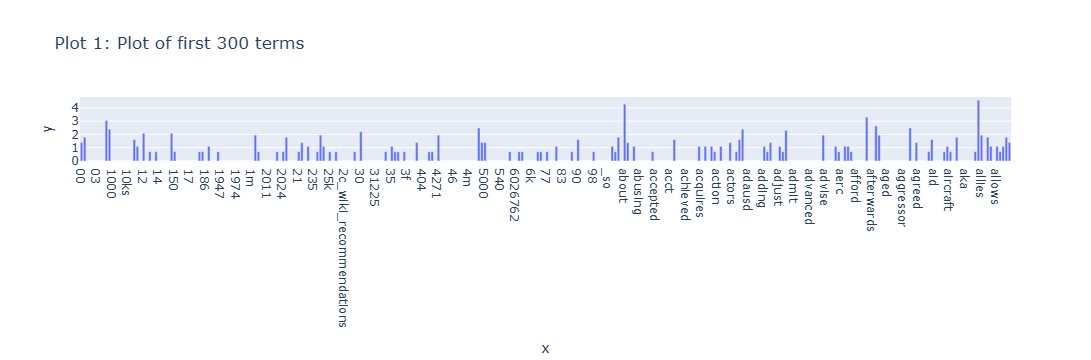

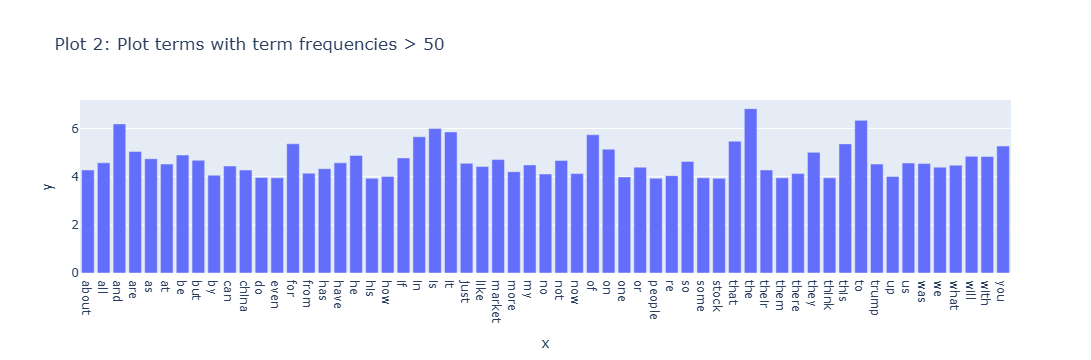

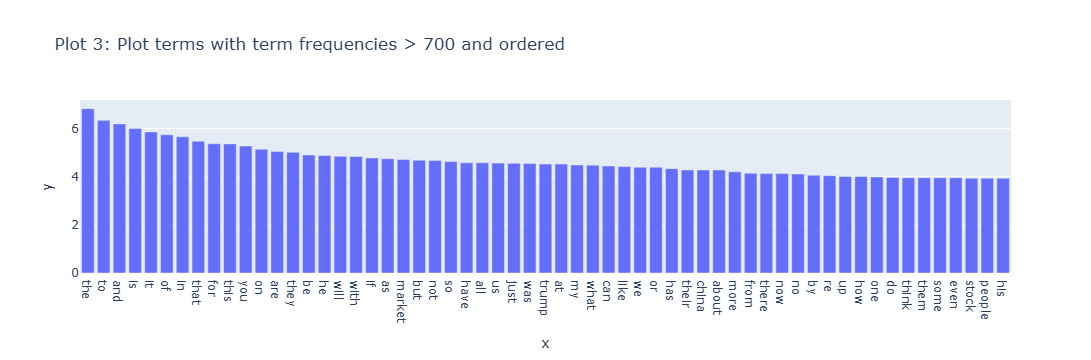

In [43]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

# Plot 1: Plot of first 300 terms
fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300],
    title="Plot 1: Plot of first 300 terms"
)
fig.show()

# Plot 2: Plot terms with term frequencies > 50
thereshold = np.array(term_frequencies_log).ravel() > math.log(50)
fig = px.bar(
    x=count_vect.get_feature_names_out()[thereshold],
    y=np.array(term_frequencies_log).ravel()[thereshold],
    title="Plot 2: Plot terms with term frequencies > 50"
)
fig.show()

# Plot 3: Plot terms with term frequencies > 50 and ordered
order = np.lexsort((np.arange(0,n_terms), term_frequencies_log))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值
thereshold = np.array(term_frequencies_log).ravel()[order] > math.log(50)
fig = px.bar(
    x=count_vect.get_feature_names_out()[order][thereshold],
    y=np.array(term_frequencies_log).ravel()[order][thereshold],
    title="Plot 3: Plot terms with term frequencies > 700 and ordered"
)
fig.show()

## New visualizations
### 1. Word Cloud

% Answer here

Word cloud show the most frequent terms (or tokens) in posts/comments, the more the word appears, the bigger the word is. We separated by subreddit or by label of sentiment (positive / neutral / negative). Use libraries like wordcloud in Python. We may exclude stopwords (but we do not do this here).

From the word cloud of label for different sentiment class we observe that:

    1. For sentiment class = negative: We see "Trump", "China", "tariff". This is quite meaningful since the stock plunge in recent year is related to changing policy related to arising tariff.

    2. For sentiment class = positive: We see adjective "good" and "technology", this aligns to our knowledge that in recent year, technology sector contributes to most of raising in stock market.


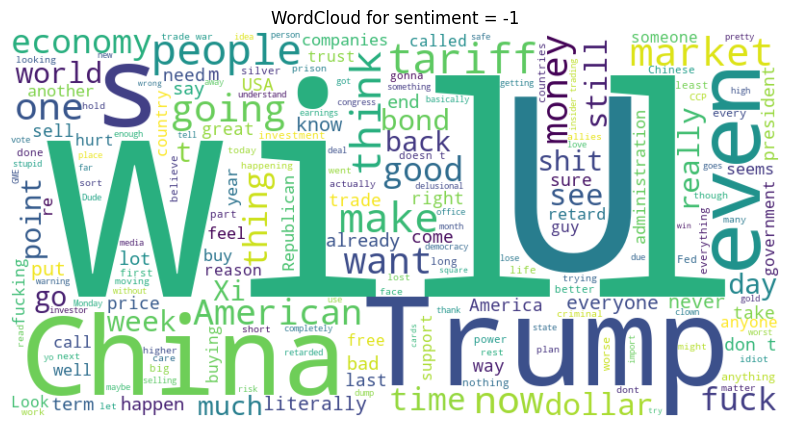

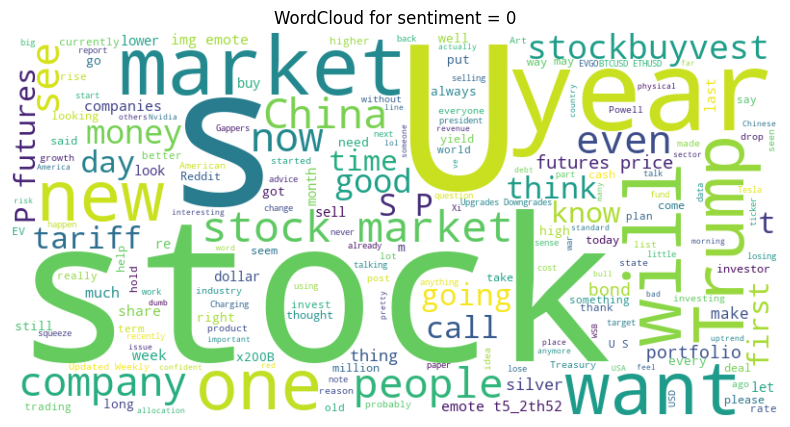

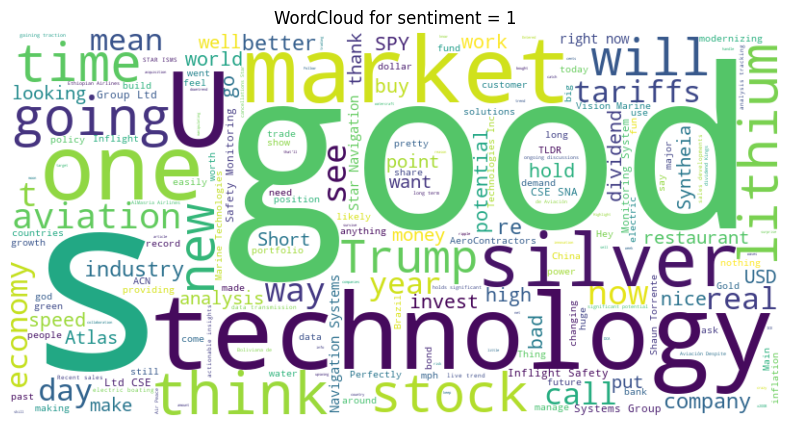

In [20]:
# %pip install wordcloud
from wordcloud import WordCloud

for sentiment_class in [-1, 0, 1]:
    texts = X.loc[X['label'] == sentiment_class, 'text']
    all_text = " ".join(texts.dropna().tolist())
    wc = WordCloud(width=800, height=400,
                   background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for sentiment = {sentiment_class}")
    plt.show()

### 2. Top 60 terms by sentiment label (variable "label")

% Answer here

For each document with certain label of sentiment class, we would mark each word in this post/comment to such label of sentiment class, so when we count terms frequencies while preserving the information of what kind of sentiment class does the document source of this terms comes. An therefore, by plot term frequencies while showing its label of sentiments, we can see the possible relation of certain word to certain positive / neutral / negative perspective.

Notice that most of the frequent word are not informative such as 'the', 'to', 'and', so we should not interpret its sentiment. But, for some proper nouns, it may be meaningful to look over its sentiment, such as 'Trump' and 'China', we can see how these two words having different distibution over label of sentiments compare to other words near them with similar term frequencies.

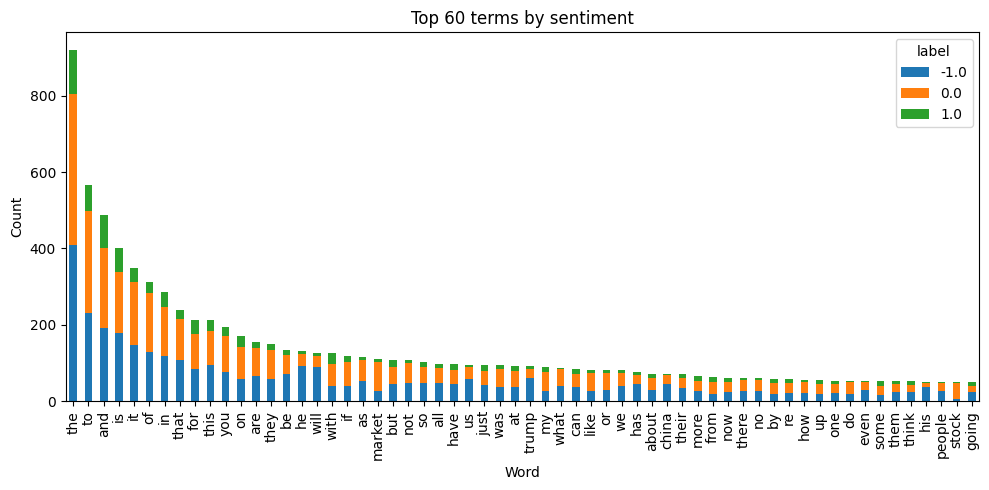

In [57]:
# Top 60 terms by sentiment
# Create clean tokens column
X = X.copy()  # avoid SettingWithCopyWarning
X['unigrams_clean'] = X['text'].fillna('').apply(analyze)
# My term-frequency-by-sentiment plot (unchanged)
df_tokens = X[['label','unigrams_clean']].explode('unigrams_clean').dropna()
counts = df_tokens.groupby(['unigrams_clean','label']).size().unstack(fill_value=0)
topN = counts.sum(axis=1).nlargest(60).index
counts.loc[topN].plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Top 60 terms by sentiment")
plt.xlabel("Word")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Phase 2

###  5.4.2 Finding frequent patterns
**Introduction to PAMI**
PAMI (PAttern MIning) is a Python-based library designed to empower data scientists by providing the necessary tools to uncover hidden patterns within large datasets. 

**Transactional Data**
In order to apply pattern mining techniques, we first need to convert our text data into transactional data. A transactional database is a set of transactions where each transaction consists of a unique identifier (TID) and a set of items. In this structure:
- TID refers to the unique identifier of each transaction (often ignored by PAMI to save storage space).
- Items refer to the elements in each transaction, which could be either integers or strings (e.g., products, words, etc.).
When preparing text data, we need to transform sentences or documents into a similar format, where each sentence or document becomes a transaction, and the words within it become the items.

**Frequent Pattern Mining**
This process identifies patterns or combinations of items that occur frequently across the dataset. Important term to learn: **Minimum Support**: It refers to the minimum frequency that a transaction has to have to be considered a pattern in our scenario.

PAMI allows us to mine various types of patterns, but for the purpuse of this lab we will explore the following types:
- **Patterns Above Minimum Support:** These are all patterns that meet a specified minimum support threshold. The result set can be quite large as it includes all frequent patterns, making it ideal for comprehensive analysis but potentially complex.
- **Maximal Frequent Patterns:** These are the largest frequent patterns that cannot be extended by adding more items without reducing their frequency below the minimum support threshold. The result set is smaller and more concise, as it only includes the largest patterns, reducing redundancy.
- **Top-K Frequent Patterns:** These patterns represent the K most frequent patterns, regardless of the minimum support threshold. The result set is highly focused and concise, with a fixed number of patterns, making it ideal when prioritizing the most frequent patterns.

In [42]:
# -1 = negative, 0 = neutral, 1 = positive
X.loc[:, "label_name"] = X["label"].map({
    -1.0: "Negative",
     0.0: "Neutral",
     1.0: "Positive"
})
X.loc[0:1,]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,Negative
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Neutral


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['label_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['label_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

In [44]:
# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [45]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category Negative:


,000,02,03,10,100,1000,10000,11,12,13,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


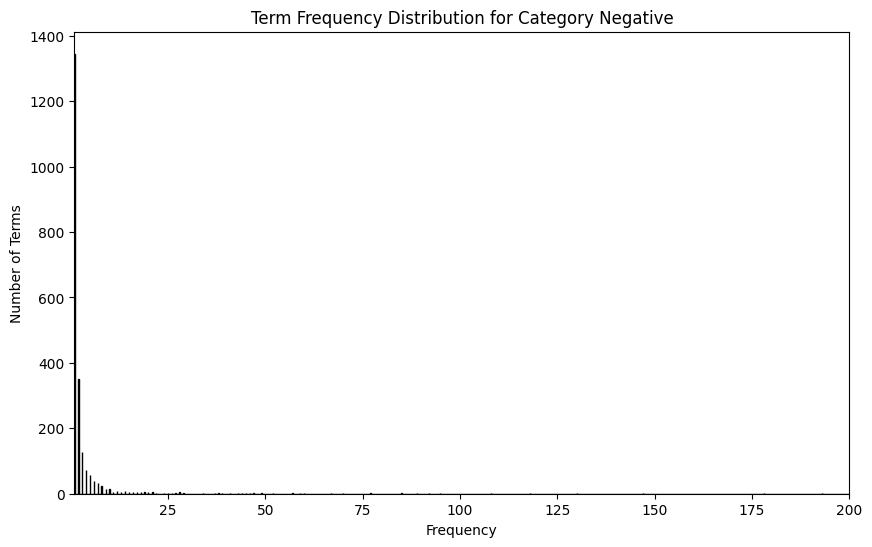

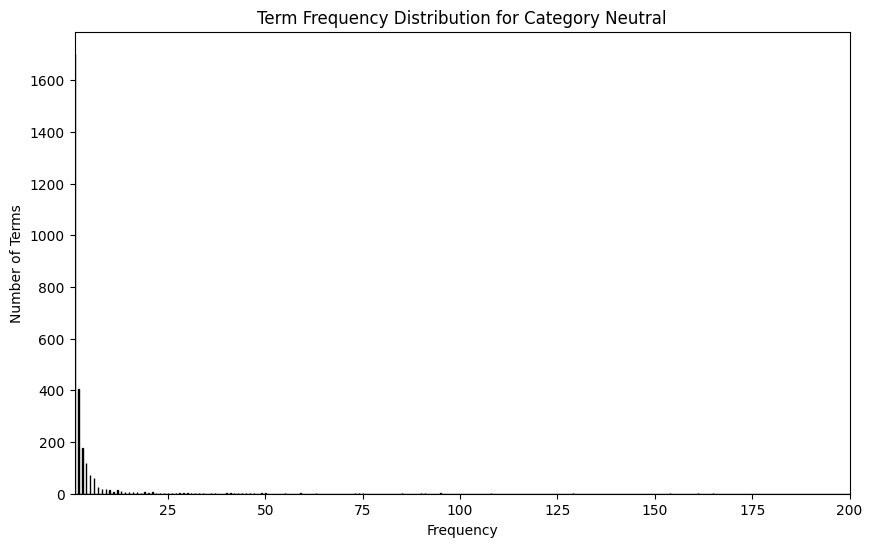

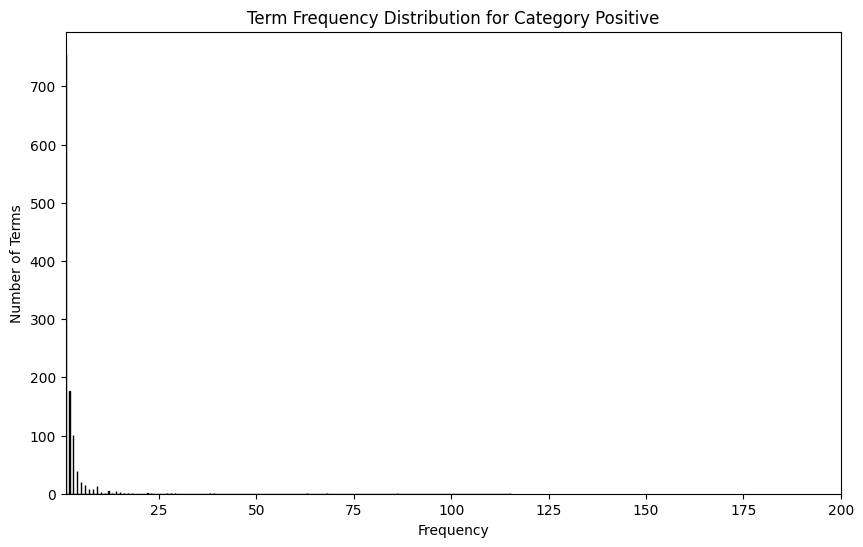

In [12]:
# Loop over all categories
for cat in categories:
    # Sum over all documents (in this category) to get total frequency for each word
    word_counts = filt_term_document_dfs[cat].sum(axis=0).to_numpy()
    
    # Visualize the frequency distribution
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {cat}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)   # same as before
    plt.show()

We visualize term frequency for each label of sentiment (group). Notice that the most frequent part / the peak looks different between different groups. (Maybe investigate later.) Overall, this graph aligns with the class excercise, most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often. This two difference pattern is much more severe than we saw in the class example data.

Specifically, we'll remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns. In this case, the choice of filtering the top 5% and bottom 1% is **arbitrary**.

In [16]:
for cat in categories:
    # Sum over all documents in this category
    word_counts = filt_term_document_dfs[cat].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]
    sorted_counts = np.sort(word_counts)[::-1]
    
    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)

    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]
    
    # Filter terms that belong to the top 5%
    filtered_words = [
        filt_term_document_dfs[cat].iloc[:, i].name 
        for i in top_5_percent_indices
    ]

    # Print results for this category
    print("="*60)
    print(f"Category: {cat}")
    print(f"Number of total terms in top 5%: {total_terms}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words[:30]} ...")  # show first 30 for readability

Category: Negative
Number of total terms in top 5%: 2192
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what'] ...
Category: Neutral
Number of total terms in top 5%: 2750
Number of terms in top 5%: 137
Filtered terms: ['the', 'to', 'and', 'it', 'is', 'of', 'in', 'that', 'you', 'for', 'this', 'on', 'market', 'they', 'are', 'if', 'with', 'as', 'not', 'be', 'my', 'was', 'like', 'but', 'or', 'what', 'at', 'stock', 'all', 'so'] ...
Category: Positive
Number of total terms in top 5%: 1172
Number of terms in top 5%: 58
Filtered terms: ['the', 'and', 'to', 'is', 'in', 'it', 'for', 'on', 'with', 'this', 'of', 'you', 'that', 'but', 'they', 'just', 'if', 'are', 'more', 'can', 'have', 'so', 'be', 'good', 'my', 'from', 'their', 'at', 'technology', 'some'] ...


In [8]:
for cat in categories:
    # Sum over all documents in this category
    word_counts = filt_term_document_dfs[cat].sum(axis=0).to_numpy()
    term_totals = pd.Series(word_counts, index=filt_term_document_dfs[cat].columns)    
    print("="*60)
    print(f"Category: {cat}")
    print(f"Number of top 3 terms:")
    print(term_totals.sort_values(ascending=False).head(3))

Category: Negative
Number of top 3 terms:
the    409
to     231
and    193
dtype: int64
Category: Neutral
Number of top 3 terms:
the    396
to     267
and    209
dtype: int64
Category: Positive
Number of top 3 terms:
the    115
and     86
to      68
dtype: int64


In [9]:
for cat in categories:
    word_counts = filt_term_document_dfs[cat].sum(axis=0).to_numpy()

    # Sort the term frequencies in ascending order and get sorted indices
    sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
    sorted_counts = word_counts[sorted_indices]  # Sort frequencies

    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)

    # Get the indices of the bottom 1% least frequent terms
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

    # Filter terms that belong to the bottom 1% based on their rank
    filtered_words = [filt_term_document_dfs[cat].iloc[:, i].name for i in bottom_1_percent_indices]

    # Print results for this category
    print("="*60)
    print(f"Category: {cat}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: Negative
Number of terms in bottom 1%: 21
Filtered terms: ['youtube', '500', 'program', '60', '65', '6k', '6th', '77', '7s', 'programs', 'projection', '98', '9k', '_are', 'aapl', '50', 'yourselves', '2k', '2s', '30', '3000']
Category: Neutral
Number of terms in bottom 1%: 27
Filtered terms: ['186', '18630', '1870', '1k', '1m', '2028', 'yahoo', 'yall', 'yea', 'worked', '2045', '208', '21', '22rate', '23', '234', '2012', '2017', '20211209', '14', '140', '145', '150', '100k', '100x', '10k', '10ks']
Category: Positive
Number of terms in bottom 1%: 11
Filtered terms: ['25', 'yesterday', 'yes', 'yelling', '200', '20', '1992', '1981', '18', '1728', '153']


### >>> **Exercise 16 (Top 5% and Bottom 1% Words):** 

We'll show the following observation using `filter_top_bottom_words_by_sum`:

- **Stopwords dominate the Top 5 %**: All categories share *the, to, and, is, it*. These are general-purpose function words, not sentiment-specific. They reflect syntax rather than emotion.
- **Numeric tokens appear in the Bottom 1 %**: all have numbers like *20, 25, 50, 60, …* it might be special symbol or real number, but both of these are not meaningful.

In [46]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Number of bottom {bottom_percent*100}% words: {bottom_n}')
    print("-"*60)
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    print(f'Number of bottom {bottom_percent*100}% words: {top_n}')
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

In [47]:
term_document_dfs = {}

for category in categories:
    print("="*60)
    print(f'For category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

For category Negative we filter the following words:
Bottom 1.0% words: 
youtube       1
500           1
program       1
60            1
65            1
6k            1
6th           1
77            1
7s            1
programs      1
projection    1
98            1
9k            1
_are          1
aapl          1
50            1
yourselves    1
2k            1
2s            1
30            1
3000          1
dtype: int64
Number of bottom 1.0% words: 21
------------------------------------------------------------
Top 5.0% words: 
these         11
dollar        11
everyone      12
could         12
literally     12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64
Number of bottom 1.0% words: 109
For category Neutral we filter the following words:
Bottom 1.0% words: 
186         1
18630       1
1870        1
1k          1
1m          1
2028        1
yahoo       1
yall        1
yea         1
worked      1
2045      

In [17]:
term_document_dfs['Negative']

,000,02,03,10,100,1000,10000,11,12,13,...,ya,yea,yeah,year,years,yet,yields,yippee,yo,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
term_document_dfs['Neutral']

,00,000,01378,027,08,100,10yr,11,118,12,...,yield,yields,young,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
term_document_dfs['Positive']

,06,10,100,116,12,2007,2021,22,235,24,...,x200b,xeqt,yamana,yeah,year,years,yields,yikes,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **In-Class (Transactional Database):** 

In [49]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 139
Standard Deviation Transaction Size : 13.325085884608757
Variance in Transaction Sizes : 178.1233848953594
Sparsity : 0.9942635444090342


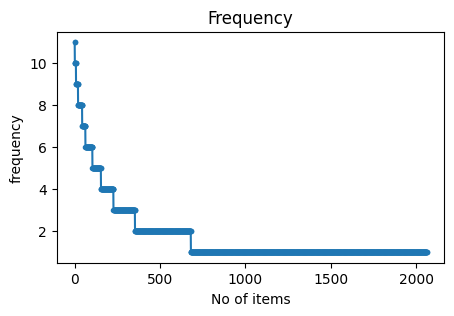

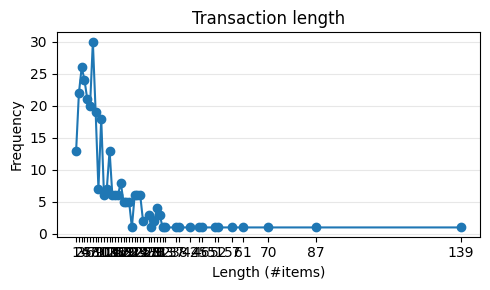

In [31]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Negative.csv')
obj.run()
obj.printStats()
plt.rcParams['figure.figsize'] = (5, 3)
obj.plotGraphs()

Database size (total no of transactions) : 417
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.764988009592326
Maximum Transaction Size : 201
Standard Deviation Transaction Size : 18.265492673393037
Variance in Transaction Sizes : 334.4302135214905
Sparsity : 0.99583720494602


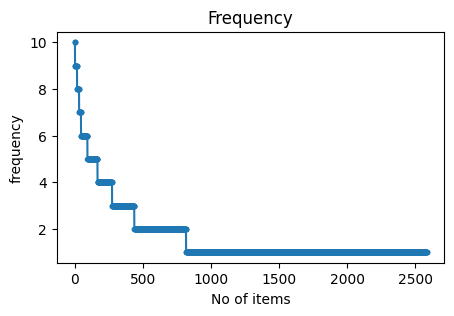

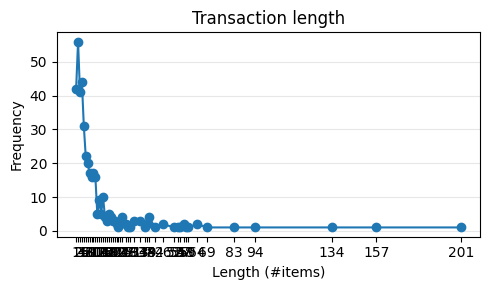

In [32]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Neutral.csv')
obj.run()
obj.printStats()
plt.rcParams['figure.figsize'] = (5, 3)
obj.plotGraphs()

Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


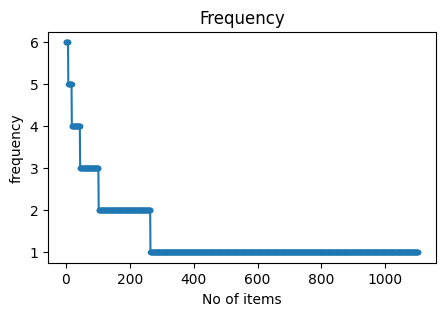

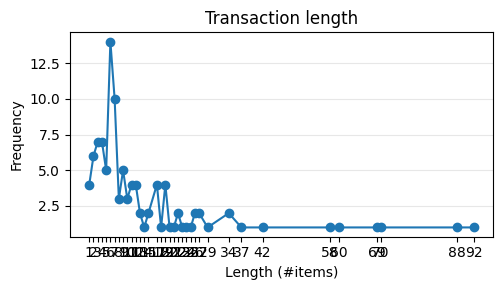

In [34]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Positive.csv')
obj.run()
obj.printStats()
plt.rcParams['figure.figsize'] = (5, 3)
obj.plotGraphs()

### >>> **Exercise 17 (Top 5% and Bottom 1% Words):** 
1. For FPGrowth, test minimum support thresholds of 5 (smaller minimum support might cost to much time), noting the runtime for these settings as well.
2. For MaxFPGrowth, test minimum support thresholds of 3, 5, and 7, noting the runtime for these settings as well.
3. For the FAE Top-K, run trials with k values of 200 (larger k might cost to much time), recording the runtime for each.

In [86]:
# List of input files and optional tags (for naming outputs)
input_files = {
    'Negative': 'td_freq_db_Negative.csv',
    'Neutral': 'td_freq_db_Neutral.csv',
    'Positive': 'td_freq_db_Positive.csv',
}
# ---------------------------------------------------------------------------
# 1) FPGrowth (PAMI)
# ---------------------------------------------------------------------------
fp_results = {}
for tag, file_path in input_files.items():
    for minSup in [5]:
        print(f'\n{"="*20} FPGrowth on {tag} | minSup = {minSup} {"="*20}')
        
        # Create and run algorithm
        obj = alg.FPGrowth(iFile=file_path, minSup=minSup)
        obj.mine()
        df = obj.getPatternsAsDataFrame()

        print('Total No of patterns:', len(df))
        print('Runtime:', obj.getRuntime(), 'seconds')
        display(df.head(5))
        display(df.tail(5))

        # Save to file (unique name)
        out_file = f'frequentPatternsDF_{tag}_minSup{minSup}.txt'
        obj.save(out_file)
        print(f'Saved patterns to {out_file}')
        
        fp_results[(tag, minSup)] = df


==================== FPGrowth on Negative | minSup = 5 ====================
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 155
Runtime: 0.004560708999633789 seconds


,Patterns,Support
0,looking,5
1,weeks,5
2,let,5
3,maybe,5
4,does,5


,Patterns,Support
150,should,10
151,bad,10
152,again,10
153,already,11
154,after,11


Saved patterns to frequentPatternsDF_Negative_minSup5.txt

==================== FPGrowth on Neutral | minSup = 5 ====================
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2214
Runtime: 0.013768672943115234 seconds


,Patterns,Support
0,red,5
1,15,5
2,pretty,5
3,usa,5
4,thoughts,5


,Patterns,Support
2209,few,9
2210,let,10
2211,most,10
2212,go,10
2213,well,10


Saved patterns to frequentPatternsDF_Neutral_minSup5.txt

==================== FPGrowth on Positive | minSup = 5 ====================
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.0 seconds


,Patterns,Support
0,new,5
1,years,5
2,our,5
3,any,5
4,no,5


,Patterns,Support
14,them,6
15,out,6
16,see,6
17,economy,6
18,way,6


Saved patterns to frequentPatternsDF_Positive_minSup5.txt


In [78]:
# ---------------------------------------------------------------------------
# 2) MaxFPGrowth (PAMI)
# ---------------------------------------------------------------------------
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
for tag, file_path in input_files.items():
    for minSup in [3, 5, 7]: # CHANGABLE: Support thresholds
        print(f'\n{"="*20} MaxFPGrowth on {tag} | minSup = {minSup} {"="*20}')

        obj = max_alg.MaxFPGrowth(iFile=file_path, minSup=minSup)
        obj.mine()                                                  
        df = obj.getPatternsAsDataFrame()

        print('Total No of patterns:', len(df))
        print('Runtime:', obj.getRuntime(), 'seconds')
        display(df.head(5))
        display(df.tail(5))


==================== MaxFPGrowth on Negative | minSup = 3 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 333
Runtime: 0.010206460952758789 seconds


,Patterns,Support
0,being,3
1,leader,3
2,remember,3
3,fair,3
4,beyond,3


,Patterns,Support
328,bad,10
329,should,10
330,sure,10
331,day,10
332,already here,3



==================== MaxFPGrowth on Negative | minSup = 5 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 155
Runtime: 0.011020421981811523 seconds


,Patterns,Support
0,media,5
1,selling,5
2,pretty,5
3,enough,5
4,won,5


,Patterns,Support
150,day,10
151,here,10
152,things,10
153,after,11
154,already,11



==================== MaxFPGrowth on Negative | minSup = 7 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 64
Runtime: 0.005988121032714844 seconds


,Patterns,Support
0,ve,7
1,since,7
2,better,7
3,reason,7
4,thing,7


,Patterns,Support
59,day,10
60,here,10
61,things,10
62,after,11
63,already,11



==================== MaxFPGrowth on Neutral | minSup = 3 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 360
Runtime: 0.026562929153442383 seconds


,Patterns,Support
0,4271,3
1,rate,3
2,keep,3
3,especially,3
4,wrong,3


,Patterns,Support
355,got,9
356,said,9
357,cash,9
358,go,10
359,let,10



==================== MaxFPGrowth on Neutral | minSup = 5 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 154
Runtime: 0.00650477409362793 seconds


,Patterns,Support
0,bought,5
1,found,5
2,yes,5
3,won,5
4,guys hey,5


,Patterns,Support
149,looking,9
150,well,10
151,go,10
152,most,10
153,let,10



==================== MaxFPGrowth on Neutral | minSup = 7 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 48
Runtime: 0.0 seconds


,Patterns,Support
0,seen,7
1,made,7
2,highlights,7
3,higher,7
4,ago,7


,Patterns,Support
43,looking,9
44,well,10
45,go,10
46,most,10
47,let,10



==================== MaxFPGrowth on Positive | minSup = 3 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 98
Runtime: 0.0030510425567626953 seconds


,Patterns,Support
0,trade,3
1,god,3
2,anything,3
3,today,3
4,position,3


,Patterns,Support
93,way,6
94,see,6
95,out,6
96,them,6
97,into,6



==================== MaxFPGrowth on Positive | minSup = 5 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 19
Runtime: 0.0009982585906982422 seconds


,Patterns,Support
0,than,5
1,better,5
2,get,5
3,me,5
4,tariffs,5


,Patterns,Support
14,out,6
15,them,6
16,us,6
17,your,6
18,into,6



==================== MaxFPGrowth on Positive | minSup = 7 ====================
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 0
Runtime: 0.0010020732879638672 seconds


,Patterns,Support


,Patterns,Support


In [81]:
# --------------------------------------------------
# 3) FAE Top-K (PAMI)
# --------------------------------------------------
from PAMI.frequentPattern.topk import FAE as topk_alg

for tag, file_path in input_files.items():
    for k in [200]: # CHANGABLE: Top-K values
        print(f'\n{"="*20} FAE Top-K on {tag} | K = {k} {"="*20}')
        
        obj = topk_alg.FAE(iFile=file_path, k=k)  
        obj.mine()                                                  
        df = obj.getPatternsAsDataFrame()
        
        print('Total No of patterns:', len(df))
        print('Runtime:', obj.getRuntime(), 'seconds')
        display(df.head(10))  # show a few patterns


==================== FAE Top-K on Negative | K = 200 ====================
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.01300191879272461 seconds


,Patterns,Support
0,already,11
1,after,11
2,things,10
3,here,10
4,day,10
5,sure,10
6,should,10
7,bad,10
8,again,10
9,end,9



==================== FAE Top-K on Neutral | K = 200 ====================
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.6650376319885254 seconds


,Patterns,Support
0,let,10
1,most,10
2,go,10
3,well,10
4,looking,9
5,cash,9
6,said,9
7,got,9
8,every,9
9,news,9



==================== FAE Top-K on Positive | K = 200 ====================
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.020107507705688477 seconds


,Patterns,Support
0,into,6
1,your,6
2,us,6
3,them,6
4,out,6
5,see,6
6,economy,6
7,way,6
8,new,5
9,years,5


### >>> **In-Class (Top 5% and Bottom 1% Words):** 

In [82]:
X['text']

0                                       Calls on retards
1      Stunt as in like why did they even make a big ...
2                      Seeing lots of red in the ticker.
3      Vision Marine Technologies Inc. is rewriting t...
4                               He didn’t say thank you.
                             ...                        
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, Length: 847, dtype: object

In [89]:
frequentPatternsDF_Negative_minSup5 = fp_results[("Negative", 5)]
frequentPatternsDF_Neutral_minSup5 = fp_results[("Neutral", 5)]
frequentPatternsDF_Positive_minSup5 = fp_results[("Positive", 5)]

In [91]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_Negative_minSup5, frequentPatternsDF_Neutral_minSup5, frequentPatternsDF_Positive_minSup5]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

       Patterns  Support
101       after       11
96         here       10
97          day       10
98         sure       10
99       should       10
..          ...      ...
17     congress        5
18   completely        5
19         sort        5
20        which        5
1         maybe        5

[2278 rows x 2 columns]
Number of patterns discarded: 110


In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,hurt,part,retarded,getting,clown,congress,completely,sort,which,maybe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 18 (Dimension Reduction):** 

In [96]:
X['label_name'].head(3)

0    Negative
1     Neutral
2     Neutral
Name: label_name, dtype: object

C:\Users\chenw\Class_DataMining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


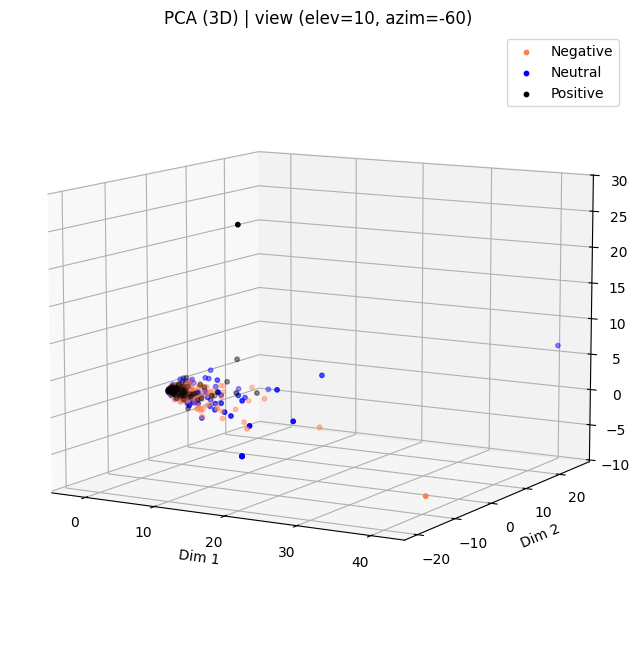

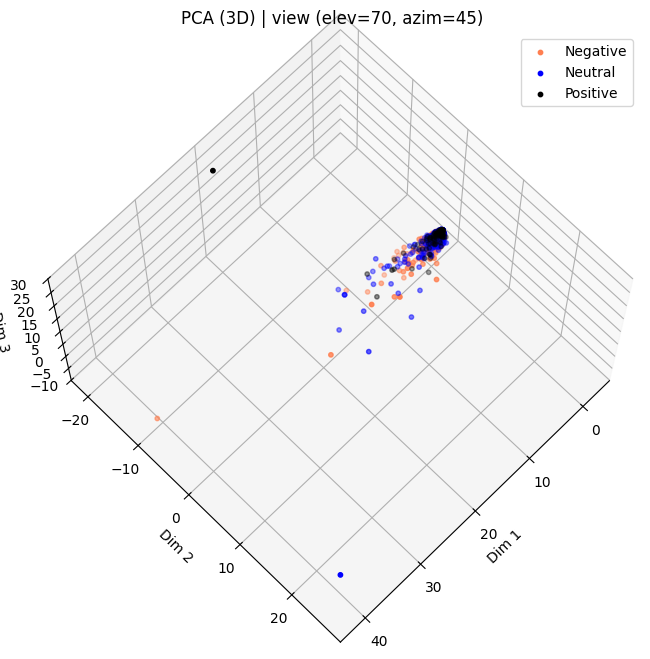

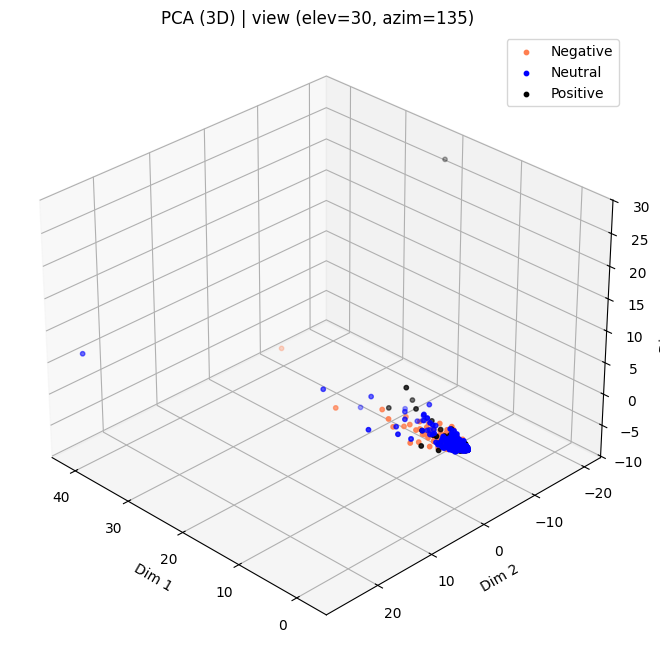

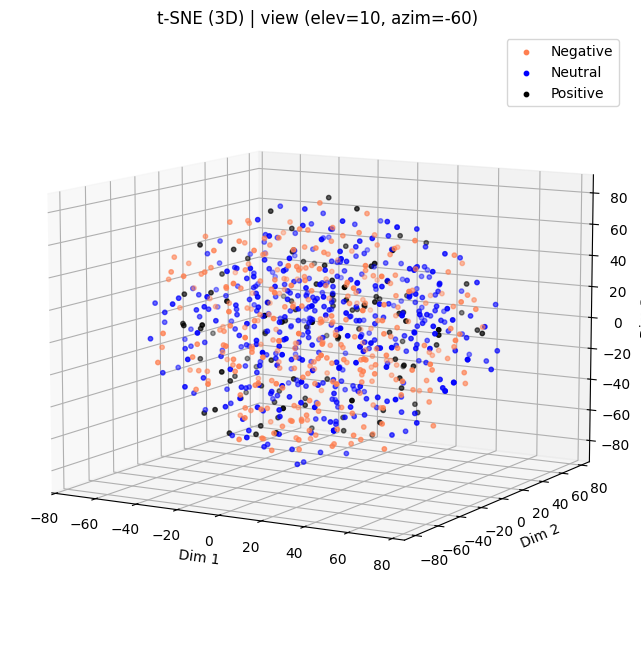

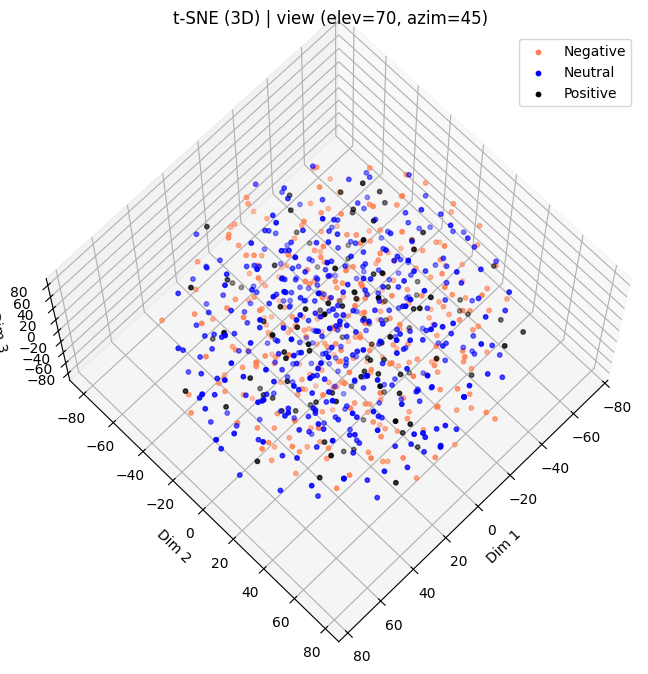

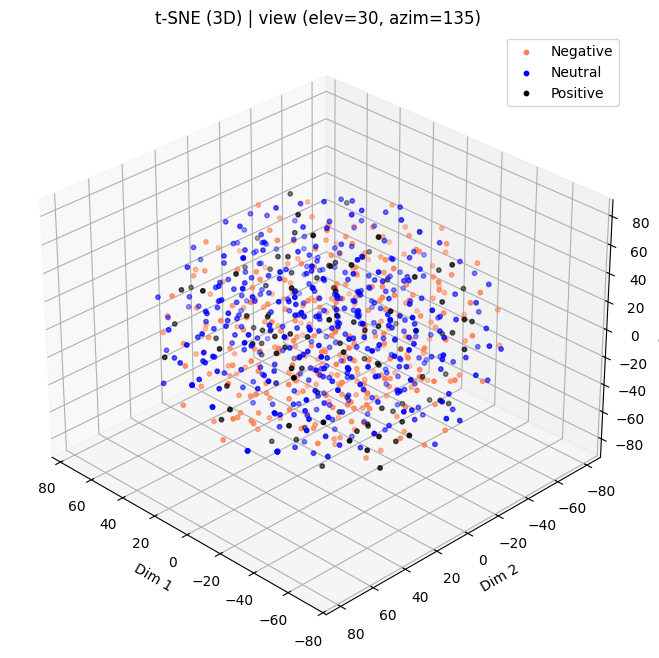

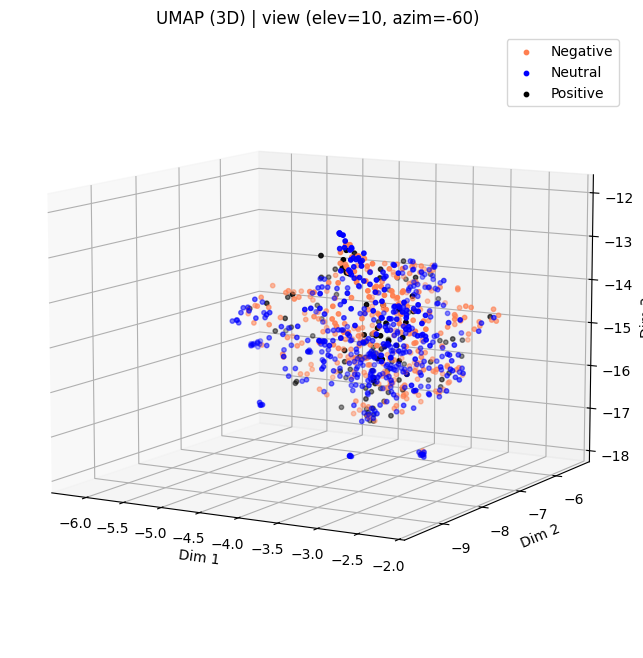

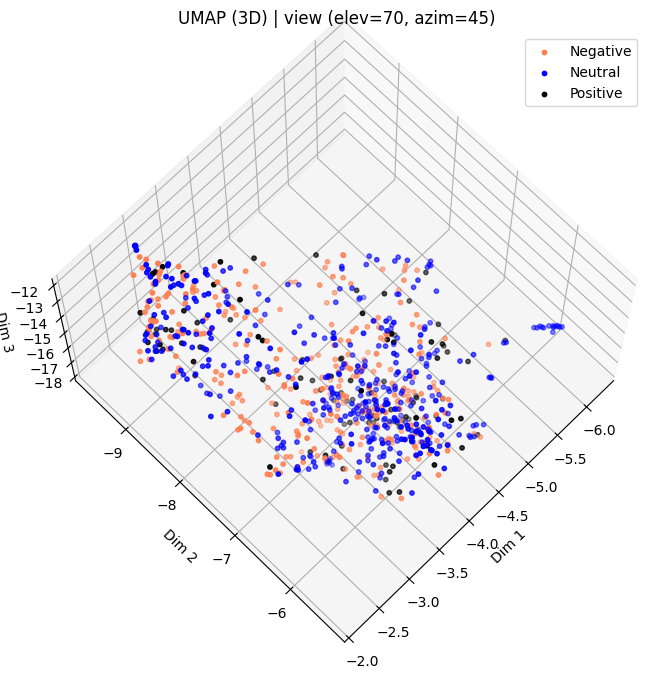

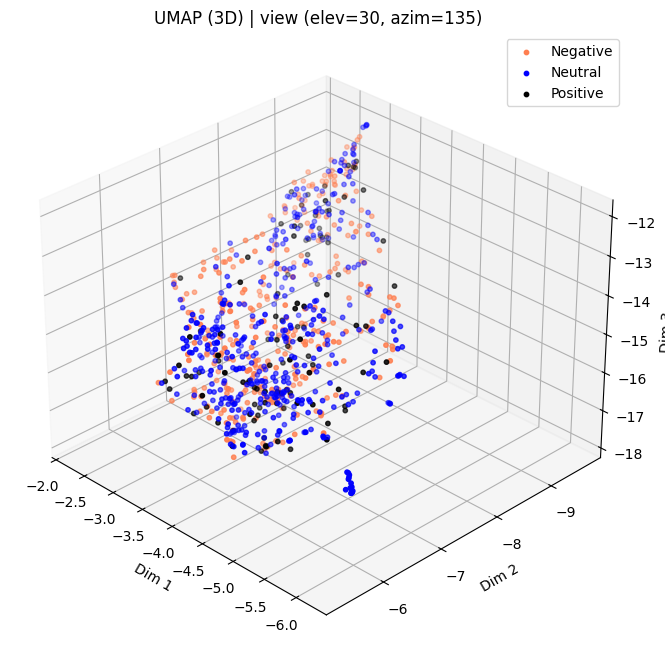

In [98]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, UMAP with 3D reduction
X_pca_tdm_3d = PCA(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3, random_state=42).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black']
categories = X['label_name'].unique()
color_map = dict(zip(categories, col)) # Order align to categories
labels = X['label_name'].values

def plot_3d_points(X_3d, title, elev, azim):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for cat in categories:
        m = (labels == cat)
        ax.scatter(X_3d[m, 0], X_3d[m, 1], X_3d[m, 2], c=color_map[cat], label=cat, s=10)
    ax.set_title(f"{title} | view (elev={elev}, azim={azim})")
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='best')
    plt.show()

views = [(10, -60), (70, 45), (30, 135)]
# PCA
for elev, azim in views:
    plot_3d_points(X_pca_tdm_3d, "PCA (3D)", elev, azim)
# t-SNE
for elev, azim in views:
    plot_3d_points(X_tsne_tdm_3d, "t-SNE (3D)", elev, azim)
# UMAP 
for elev, azim in views:
    plot_3d_points(X_umap_tdm_3d, "UMAP (3D)", elev, azim)    

### 5.6 Discretization and Binarization
### >>> **Exercise 19 (Binarization/One-Hot Coding Generation):** 

In [102]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label)
X['bin_label'] = mlb.transform(X['label']).tolist()
X[0:9]

,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name,tokenized_text,bin_label
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,Negative,"{retards, on, Calls}","[1, 0, 0]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Neutral,"{talk, in, they, ever., did, even, as, make, f...","[0, 1, 0]"
2,comment,StockMarket,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,Neutral,"{of, lots, in, red, the, Seeing, ticker.}","[0, 1, 0]"
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,Positive,"{groundbreaking, of, Their, just, your, waterc...","[0, 0, 1]"
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,Negative,"{He, didn’t, you., say, thank}","[1, 0, 0]"
5,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,Neutral,"{ejaculate, in, puss, to, warm, Hoping, tonigh...","[0, 1, 0]"
6,comment,stocks,Is the market in complete denial right now?,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,Negative,"{down, personally, if, few, quickly, increasin...","[1, 0, 0]"
7,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,Neutral,"{of, just, this, months,, slowly, Its, 2, a, C...","[0, 1, 0]"
8,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,Positive,"{held, Green, Third, here?, on, breakout, Perf...","[0, 0, 1]"


# 6. Data Exploration
### >>> **Exercise 20 (Cosine Similarity):** 

In [107]:
X.shape

(847, 15)

In [108]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

document_to_transform_1 = [X.iloc[200]['text']]
document_to_transform_2 = [X.iloc[400]['text']]
document_to_transform_3 = [X.iloc[600]['text']]

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.303046
Cosine Similarity using count bw 1 and 3: 0.212132
Cosine Similarity using count bw 2 and 3: 0.035714
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\chenw\AppData\Local\Temp\ipykernel_45392\2232541045.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\chenw\AppData\Local\Temp\ipykernel_45392\2232541045.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\chenw\AppData\Local\Temp\ipykernel_45392\2232541045.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

# 7. Data Classification
## Naive Bayes
### >>> **In-Class (Naive Bayes on Original DTM):** 

In [121]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



### >>> **Exercise 21 (Naive Bayes on Augumented DTM):** 

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'label_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
# X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42, shuffle=True)

# Train the Naive Bayes classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (augmented):\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (augmented): 0.5843137254901961

Classification Report (augmented):
               precision    recall  f1-score   support

    Negative     0.5738    0.7143    0.6364        98
     Neutral     0.6220    0.6529    0.6371       121
    Positive     0.0000    0.0000    0.0000        36

    accuracy                         0.5843       255
   macro avg     0.3986    0.4557    0.4245       255
weighted avg     0.5157    0.5843    0.5469       255



### >>> **Exercise 22 (Discussion):**

There are differences between the results obtained using the original TDM and those obtained using the augmented TDM.

Augumented TDM acheives slightly lower acurracy compare to original TDM, from 0.592 to 0.584, it is an decrease in overall accuracy by ~1.4 percentage point. So adding pattern-based features actually slightly degraded performance rather than improving it. These might be the reason: 
- **1. Added noisy or redundant features**: The pattern features you added may not all be informative — some may co-occur randomly across classes. This increases dimensionality and “dilutes” useful signals, especially for simpler classifiers. **This might be a reason for my minimum support actually use same cutoff over different groups of labels.** Tt is noticable that the transcation length of positive group is much smaller (maximum about 15) than the others (maximum about 30~60). **Same minimum support cutoff might include more noise in other group.**
- **2. Curse of dimensionality**: Each new column expands the feature space. If many added features are sparse or correlated with existing terms, the model’s parameter estimates become less stable. 
- **3. Feature imbalance**: Some patterns may appear very frequently or very rarely, leading to skewed counts that distort class priors or decision boundaries.                                                                                                  
- **4. Model assumption**: Naive Bayes assume independence between features. If you add overlapping features, if we violates the assumption it can reduce performance.          
- **5. Small dataset relative to feature size**: When you add many binary columns but have limited samples, the model starts to “spread” its learning signal too thin — effectively underfitting or overfitting.  


Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.835286424609123
Variance in Transaction Sizes : 286.07571824160607
Sparsity : 0.9870471105738559


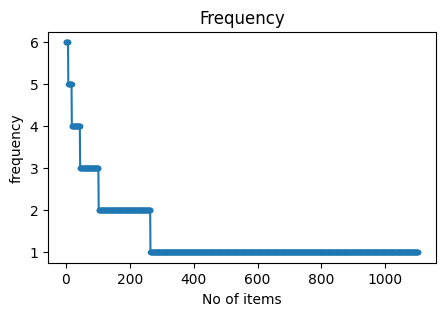

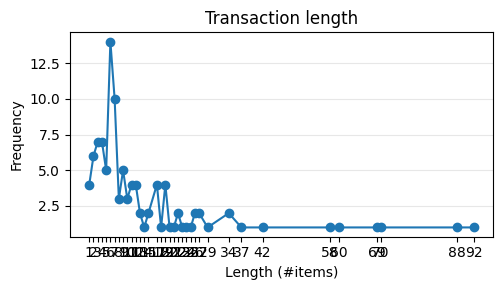

In [115]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_Positive.csv')
obj.run()
obj.printStats()
plt.rcParams['figure.figsize'] = (5, 3)
obj.plotGraphs()

## Decision Tree Classifier
### >>> **Exercise 24 (Decision Tree on Original DTM and Augumented DTM):**

In [113]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    Negative     0.4878    0.4082    0.4444        98
     Neutral     0.5294    0.6694    0.5912       121
    Positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



In [114]:
# Decision Tree with document-term frequency data and augumented frequrnt patterns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)
print("Decision Tree Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\nClassification Report  (augmented):\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented): 0.5333333333333333

Classification Report  (augmented):
               precision    recall  f1-score   support

    Negative     0.5738    0.7143    0.6364        98
     Neutral     0.6220    0.6529    0.6371       121
    Positive     0.0000    0.0000    0.0000        36

    accuracy                         0.5843       255
   macro avg     0.3986    0.4557    0.4245       255
weighted avg     0.5157    0.5843    0.5469       255



### >>> **Exercise 24 (Discussion):**
Augumented TDM acheives slightly higher acurracy compare to original TDM, from 0.490 to 0.533, it is an increase in overall accuracy by ~8.78 percentage point. It also improves both macro and weighted F1-scores in similar scale as accuracy. We might infer that adding pattern-based features is useful for it contribute additional discriminative information beyond word frequencies alone.

### >>> **Exercise 23 (Comparison):**
Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

Similar to the Lab Excercise result. Despite both using the same term–document features, Decision Tree ≈ 0.49 accuracy while Naive Bayes ≈ 0.59 accuracy. The reason might lie on the nature of the algorithm and the nature of the text data. Text data that organized into TDM has tens of thousands of features (words). Each document only has a few non-zero entries, it is very sparse! Naive Bayes handles that gracefully, each word contributes a small log-probability to class evidence. Decision Trees, however, has no assumptions and try to split on individual features — most words are rare, so splits are unstable. 

In conclusion, unlike Naive Bayes rely on probabilistic structure and conditionally independent given the class which gives stability, Decision Tree splits greedily on single features leading to **overfits or fails to generalize with too many sparse features.**

### >>> **Exercise 25 (Model Selection):**
- **Observe the data:** The nature of the data should always guide our model choice. For example, is it high-dimensional, sparse (like TDMs) or dense, continuous, structured? Or maybe, is it sequential or time-related? Different nature need different model. In our text data classification, linear or probabilistic models handle many features and zero entries efficiently.
- **Compare empirical result/performance:** Always measure (1) Accuracy, F1-score (for balanced datasets), (2) Macro vs. Weighted F1 (for imbalanced classes), and (3) Precision vs. Recall trade-offs depending on our goal. In this example: Naive Bayes has better overall accuracy, Macro vs. Weighted F1 than Decision Tree, so we choose the former since it is empirically better suited for this problem.
- **Other practical consideration:** Computation cost (Trees and ensembles can be slower), Training data size (Larger data enables complex model), Feature type, Interpretability needs (statistical models > neural models)

## TF-IDF Features

- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [123]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

# --- targets / names ---
y = X['label'].values
cat_map = dict(X[['label', 'label_name']].drop_duplicates().values)
target_names = [cat_map[i] for i in sorted(cat_map)]

# If tdm_df is a pandas DataFrame, convert to CSR for speed
X_counts = sparse.csr_matrix(tdm_df.values) if hasattr(tdm_df, "values") else tdm_df

# TF-IDF from the COUNT matrix
tfidf = TfidfTransformer(use_idf=True, sublinear_tf=True, norm='l2')
X_tfidf = tfidf.fit_transform(X_counts)

# Split once to compare fairly (apples-to-apples)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_counts, y, test_size=0.30, random_state=42
)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(
    X_tfidf, y, test_size=0.30, random_state=42
)

# --------------------------------------------------
# 1) Classifier 1: MultinomialNB on raw COUNTS (classic text NB)
# --------------------------------------------------
nb_counts = MultinomialNB(alpha=1.0)
nb_counts.fit(Xc_train, yc_train)
pred_counts = nb_counts.predict(Xc_test)

print("==================== MultinomialNB on COUNTS ====================")
print("Accuracy:", accuracy_score(yc_test, pred_counts))
print(classification_report(yc_test, pred_counts, target_names=target_names, digits=4))

# --------------------------------------------------
# 2) Classifier 2: ComplementNB on TF-IDF (usually better with tf-idf & imbalance)
# --------------------------------------------------
nb_tfidf = ComplementNB(alpha=1.0, norm=False)   # norm=False since vectors already L2-normalized
nb_tfidf.fit(Xt_train, yt_train)
pred_tfidf = nb_tfidf.predict(Xt_test)

print("\n==================== ComplementNB on TF-IDF ====================")
print("Accuracy:", accuracy_score(yt_test, pred_tfidf))
print(classification_report(yt_test, pred_tfidf, target_names=target_names, digits=4))

==================== MultinomialNB on COUNTS ====================
Accuracy: 0.592156862745098
              precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255


==================== ComplementNB on TF-IDF ====================
Accuracy: 0.5254901960784314
              precision    recall  f1-score   support

    Negative     0.5574    0.6939    0.6182        98
     Neutral     0.6117    0.5207    0.5625       121
    Positive     0.1000    0.0833    0.0909        36

    accuracy                         0.5255       255
   macro avg     0.4230    0.4326    0.4239       255
weighted avg     0.5186    0.5255    0.5173       255



In [124]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

# --- targets / names ---
y = X['label'].values
cat_map = dict(X[['label', 'label_name']].drop_duplicates().values)
target_names = [cat_map[i] for i in sorted(cat_map)]

# If augumented_df is a pandas DataFrame, convert to CSR for speed
X_counts = sparse.csr_matrix(augmented_df.values) if hasattr(augmented_df, "values") else augmented_df

# TF-IDF from the COUNT matrix
tfidf = TfidfTransformer(use_idf=True, sublinear_tf=True, norm='l2')
X_tfidf = tfidf.fit_transform(X_counts)

# Split once to compare fairly (apples-to-apples)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_counts, y, test_size=0.30, random_state=42
)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(
    X_tfidf, y, test_size=0.30, random_state=42
)

# --------------------------------------------------
# 1) Classifier 1: MultinomialNB on raw COUNTS (classic text NB)
# --------------------------------------------------
nb_counts = MultinomialNB(alpha=1.0)
nb_counts.fit(Xc_train, yc_train)
pred_counts = nb_counts.predict(Xc_test)

print("==================== MultinomialNB on COUNTS ====================")
print("Accuracy:", accuracy_score(yc_test, pred_counts))
print(classification_report(yc_test, pred_counts, target_names=target_names, digits=4))

# --------------------------------------------------
# 2) Classifier 2: ComplementNB on TF-IDF (usually better with tf-idf & imbalance)
# --------------------------------------------------
nb_tfidf = ComplementNB(alpha=1.0, norm=False)   # norm=False since vectors already L2-normalized
nb_tfidf.fit(Xt_train, yt_train)
pred_tfidf = nb_tfidf.predict(Xt_test)

print("\n==================== ComplementNB on TF-IDF ====================")
print("Accuracy:", accuracy_score(yt_test, pred_tfidf))
print(classification_report(yt_test, pred_tfidf, target_names=target_names, digits=4))

==================== MultinomialNB on COUNTS ====================
Accuracy: 0.5843137254901961
              precision    recall  f1-score   support

    Negative     0.5738    0.7143    0.6364        98
     Neutral     0.6220    0.6529    0.6371       121
    Positive     0.0000    0.0000    0.0000        36

    accuracy                         0.5843       255
   macro avg     0.3986    0.4557    0.4245       255
weighted avg     0.5157    0.5843    0.5469       255


==================== ComplementNB on TF-IDF ====================
Accuracy: 0.5372549019607843
              precision    recall  f1-score   support

    Negative     0.5664    0.6531    0.6066        98
     Neutral     0.6033    0.6033    0.6033       121
    Positive     0.0000    0.0000    0.0000        36

    accuracy                         0.5373       255
   macro avg     0.3899    0.4188    0.4033       255
weighted avg     0.5039    0.5373    0.5194       255



### Discussion & Comparison
- Different NB classifier: The count-based MultinomialNB preserves absolute frequency information, which helps when sentiment words (“good”, “bad”) repeat often. The TF-IDF-based ComplementNB downweights frequent but non-informative words (“the”, “is”), yet also weakens rare but decisive cues for small classes like Positive. This explains the drop in recall for Positive and lower overall accuracy with TF-IDF features.
- NB classifier on Augmented df: Augmentation with feature patterns helps Naive Bayes overcome the “bag-of-words independence” limitation. But if the extract frequent pattern is noisy, it might degrade the performance. This is seen in Naive Bayes on counts.
- TF-IDF NB classifier on Augmented df: Although augmentation with feature patterns may not work well when the extract pattern is not good enough, it works synergistically with TF-IDF since TF-IDF already suppresses common words and strengthen the sematic information. This allows the pros of augmented patterns to stand out.

In conclusion:
- MultinomialNB (Counts): Best for short, topic-focused texts (e.g., news headlines, reviews) where frequent words are strong indicators of class.
- ComplementNB (TF-IDF): Better when classes are imbalanced or texts are long and varied (e.g., social media, mixed opinions) where simple counts would overemphasize high-frequency but non-discriminative terms.

## Final Discussion

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

### 1. PCA/t-SNE/UMAP applied directly on raw TDM
**Issue:** t-SNE/UMAP on high-dimensional sparse counts is noisy/slow; PCA on sparse requires densification.
**Improvements**
- We should try to reduce the explosive components with some method, then run t-SNE/UMAP on the low-dim representation.
- Better tuning and deeper observation is needed

### 2 Pattern features may be noisy / redundant

**Issue:** Pattern matrix marks presence if all words appear anywhere; this ignores order/window and may duplicate unigram signal.
**Improvements**
- Phrase mining with window constraints (bigrams/trigrams)
- For different frequent pattern mining, choose the cutoff more carefully. For example, use different cutoff for different group of label here!
- Filter patterns by **discriminativeness** (need more research on other method)
- Lemmatization inside patterns to align with vectorizer preprocessing. (Avoid same word but in different form to be count respectively.)
- Consider weighting pattern features (TF-IDF) more early and in other method

### 3 No feature selection / regularization

**Issue:** Augmentation added many weak/collinear features
**Improvements**
- Search for method to deal with this problem

### 4 No stratification / class imbalance handling
**Issue:** Classes may be imbalanced; random splits can skew metrics.
**Improvements**
- Add stratification when training
- Consider class-weighted models if needed.